# Module 3 R Practice 

The exercises in this notebook are in R using the ggplot2 package. ggplot2 is created by Hadley Wickham based on the grammar of graphics approach of Leland Wilkinson. It abstracts the graphics into components regarding the data, aesthetics, geometric objects, transformations, etc. and makes it possible to create different layers of visualization on the same graphics. ggplot2 is more verbose for simple graphics, but is less verbose and object oriented for more complex graphics. 

The dataset used in this notebook is tipping information recorded in a restaurant and has the following attributes:

* total_bill in dollars
* tip in dollars
* sex of the payer 
* whether there were smokers in the party
* day of the week
* time of day
* size of the party

### References for plotting in R


* **Reference** [ggplot documentation](http://docs.ggplot2.org/current/)
* **Reference** [R ggplot package](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf)
* **Reference** [R ggplot cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* **Reference** [ggplot examples](http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html)
* **Reference** [R color cheatsheet](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf)

Read the data from tips text file in "../../../datasets/tips.txt" into the dataframe called tips_data

In [1]:
library(ggplot2)

tips_data = read.csv('../../../datasets/tips.txt')
head(tips_data)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


**Activity 1: ** Plot a bar chart where the height of the bar shows the **number** of tips per day.

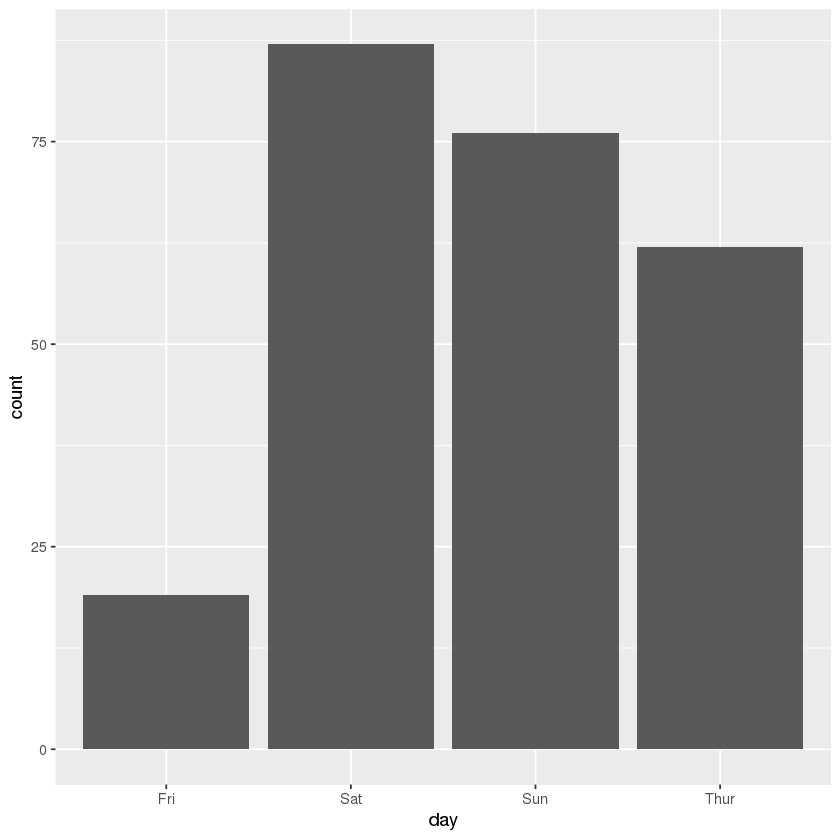

In [2]:
# stat="count" is default, we can omit it. 
p <- ggplot(tips_data, aes(x=day)) + geom_bar(stat="count")
p

**Activity 2: ** Plot a bar chart where the height of the bar shows the **total amount** of tips per day.

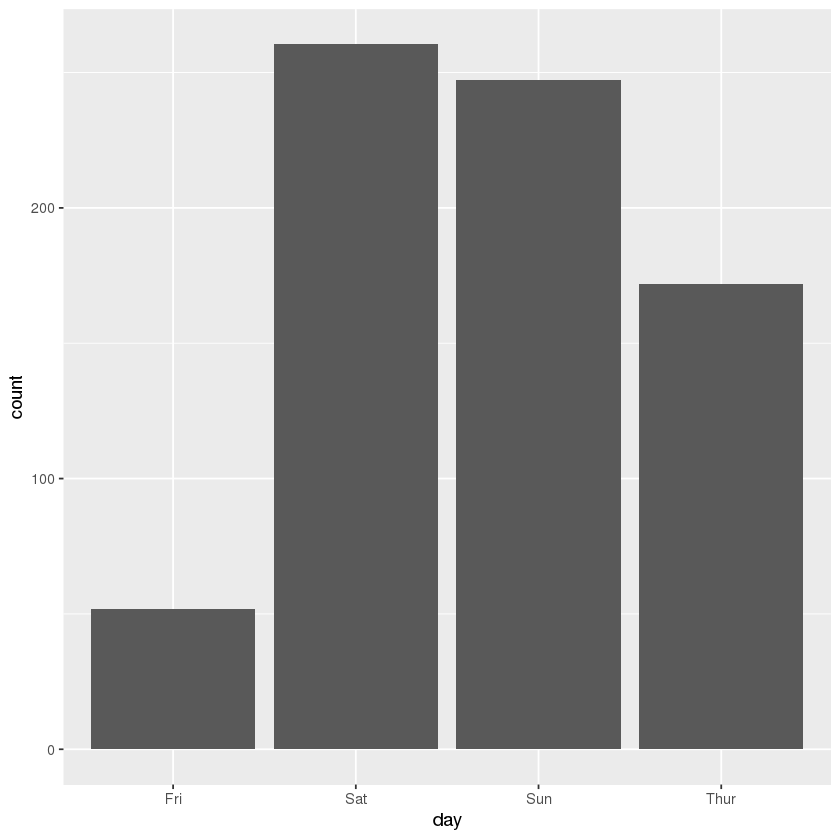

In [3]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar())

**Activity 3: ** Plot a bar chart where the height of the bar shows the **total amount** of tips per day for each sex.

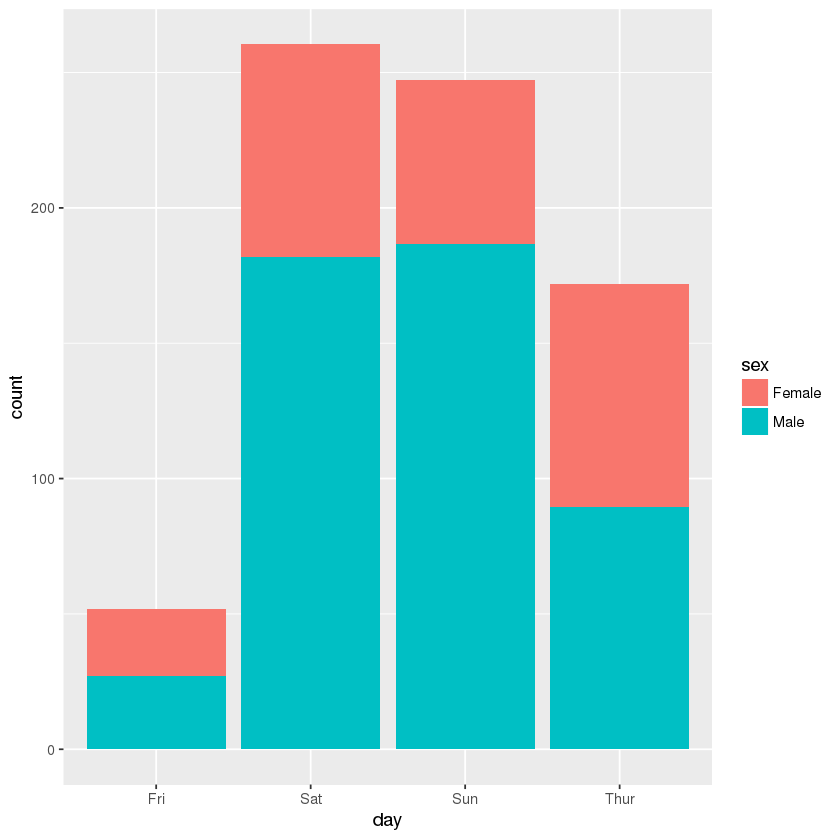

In [4]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar(aes(fill=sex)))

This was a stacked bar chart and it doesn't really show a great comparison between two categories; we know that aligned bars give better visual comparison. So let's change this:

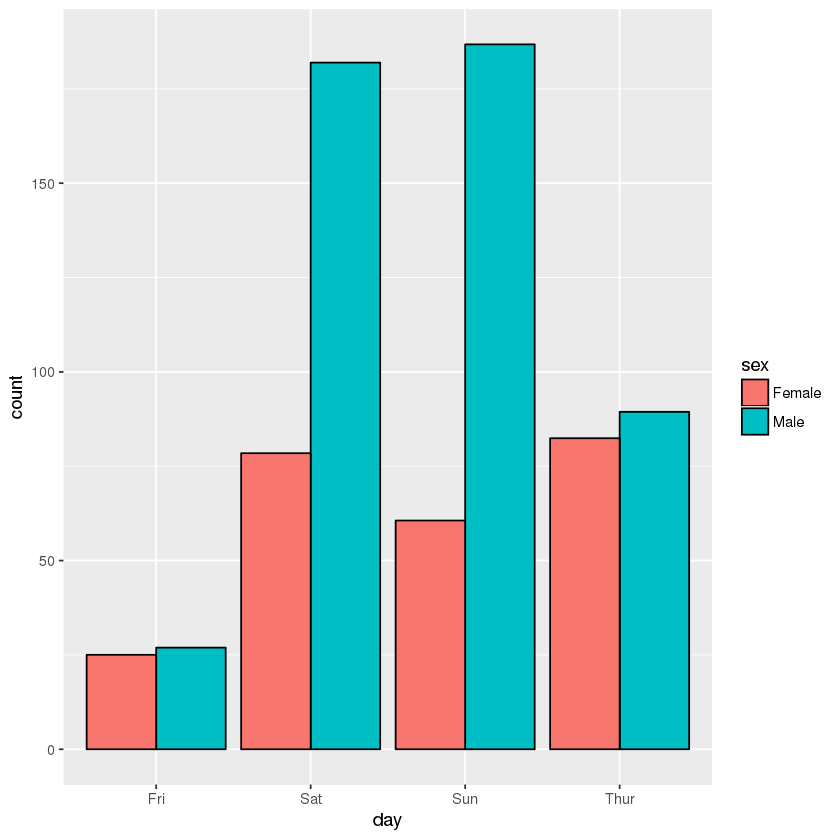

In [5]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar(position="dodge",aes(fill=sex),colour="black"))

This is better. So we can see Fridays are not a good day for waiters according to this data set. Let's change the colors by adding *scales*. 

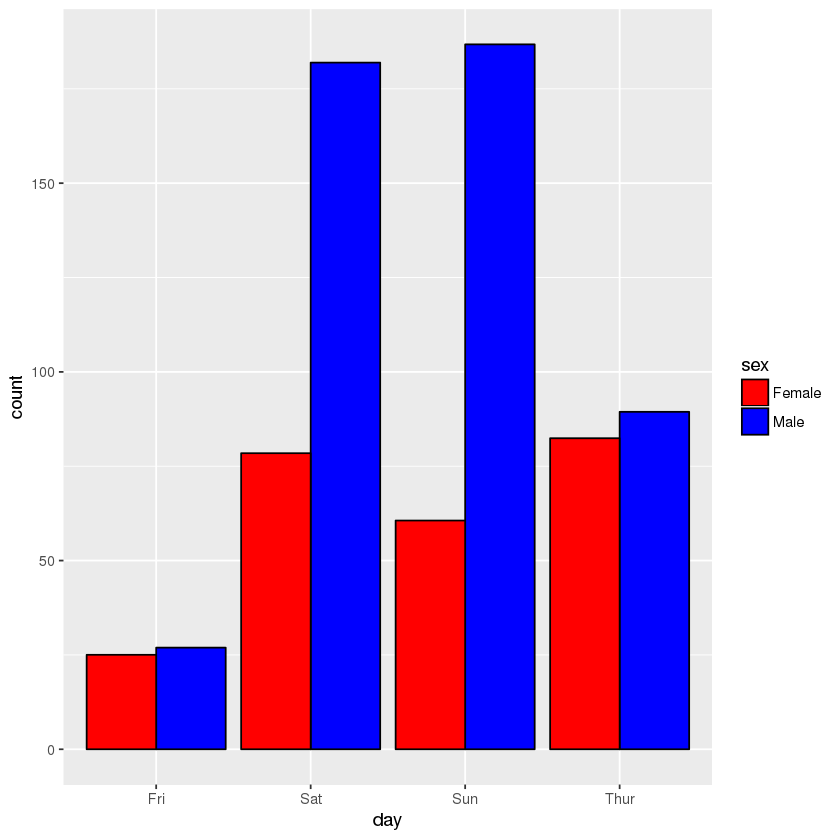

In [6]:
(p + scale_fill_manual(values = c("red","blue")))

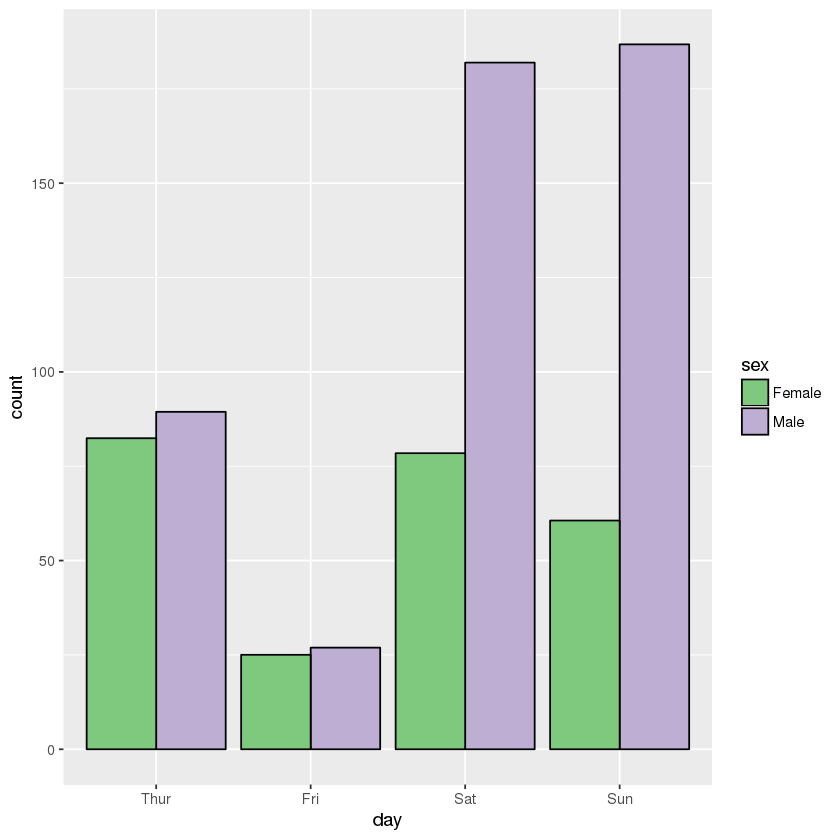

In [7]:
#let's use colors with less visual weight and reorder
(p + scale_fill_brewer(palette="Accent") + scale_x_discrete(limits=c("Thur","Fri","Sat","Sun"))) 

**Activity 4: ** Plot a scatter plot of tip vs. total bill using sex and smoker status as facets.

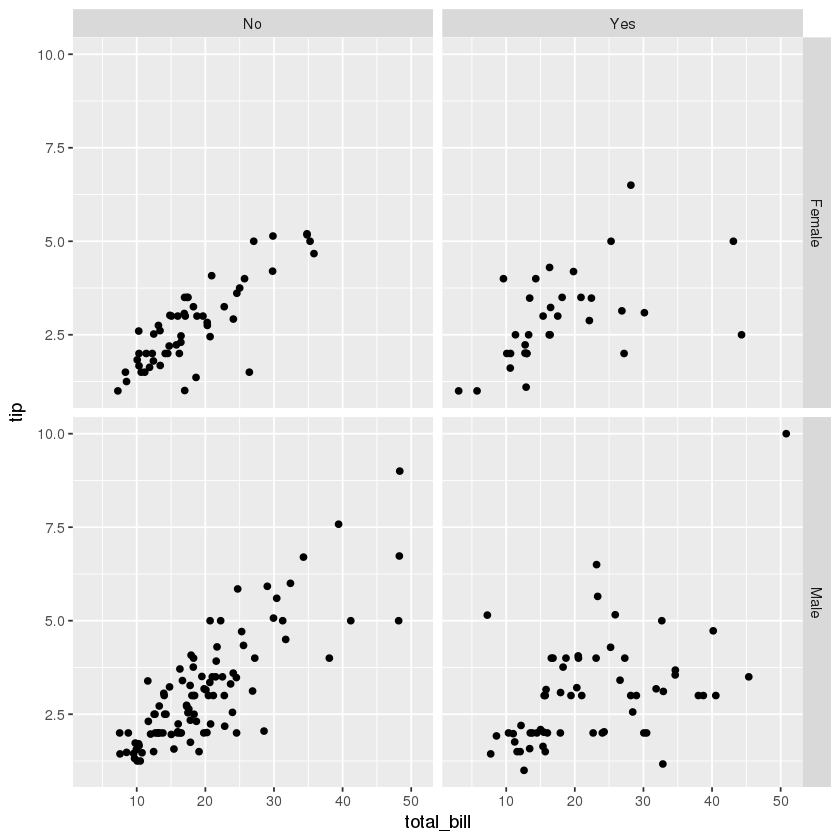

In [8]:
(p <- ggplot(tips_data, aes(x=total_bill,y=tip)) + geom_point() + facet_grid(sex ~ smoker))

`geom_smooth()` using method = 'loess'


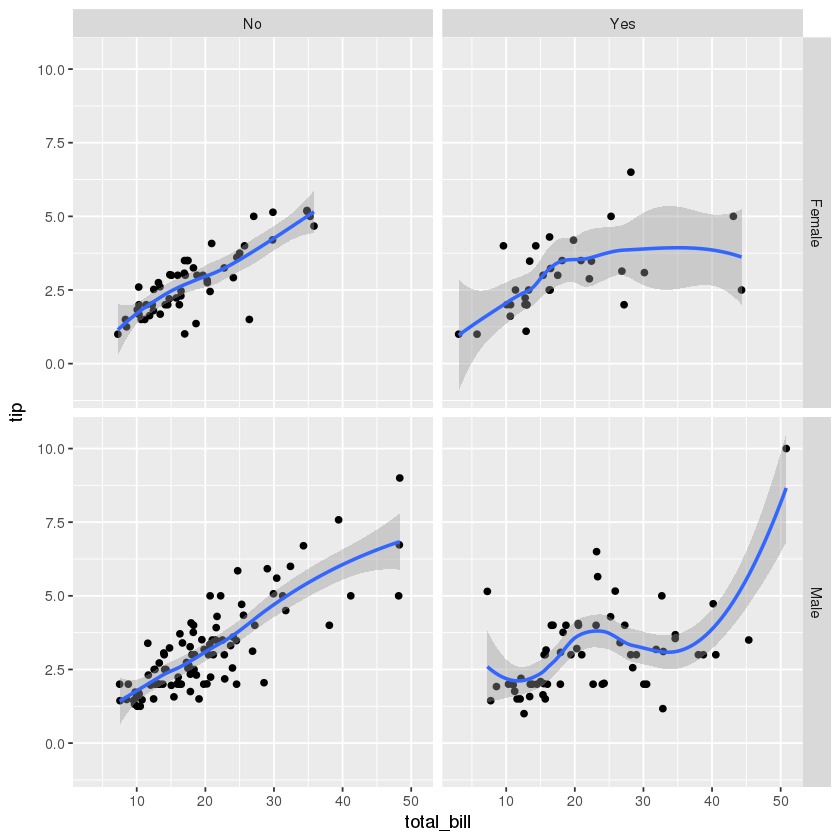

In [9]:
# We can also add a fitted curve to it as another layer. 
(p <- ggplot(tips_data, aes(x=total_bill,y=tip)) + geom_point() + facet_grid(sex ~ smoker)) + geom_smooth()

**Activity 5: ** Draw a scatter plot for variables total_bill and tip using sex and smoker as facets. Map the 'day' and 'size' attributes to *color* and *shape* visual variables, respectively.

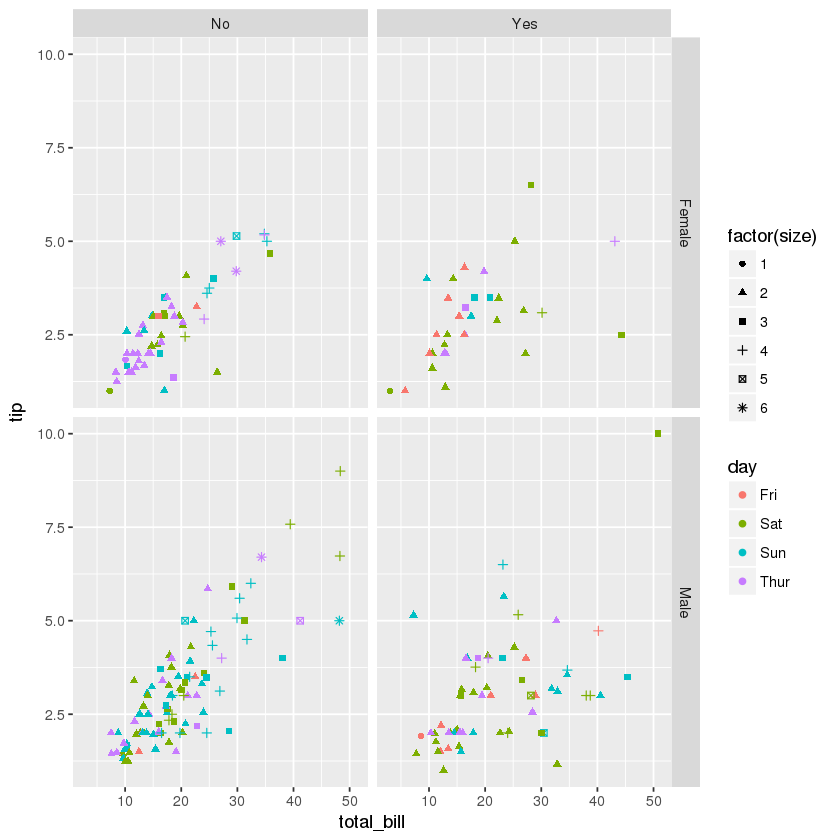

In [10]:
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,shape=factor(size))) + geom_point()
p + facet_grid(sex ~ smoker)

The above plot is reimplementation of the plot from the bottom of the page [here](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html), and is a nice example of how to mess with the visual variables. We know that 'size' attribute is quantitative; using shape visual variable for it does not make an efficient visualization. Similarly, 'day' attribute is ordinal; so we need a sequential color palette in order to map it to preattentive colors. Let's redo this plot the right way.

**Activity 6: ** Draw a scatter plot for variables total_bill and tip using sex and smoker as facets. Map the 'day' and 'size' attributes to *color* and *size* visual variables, respectively. Use a sequential color palette.

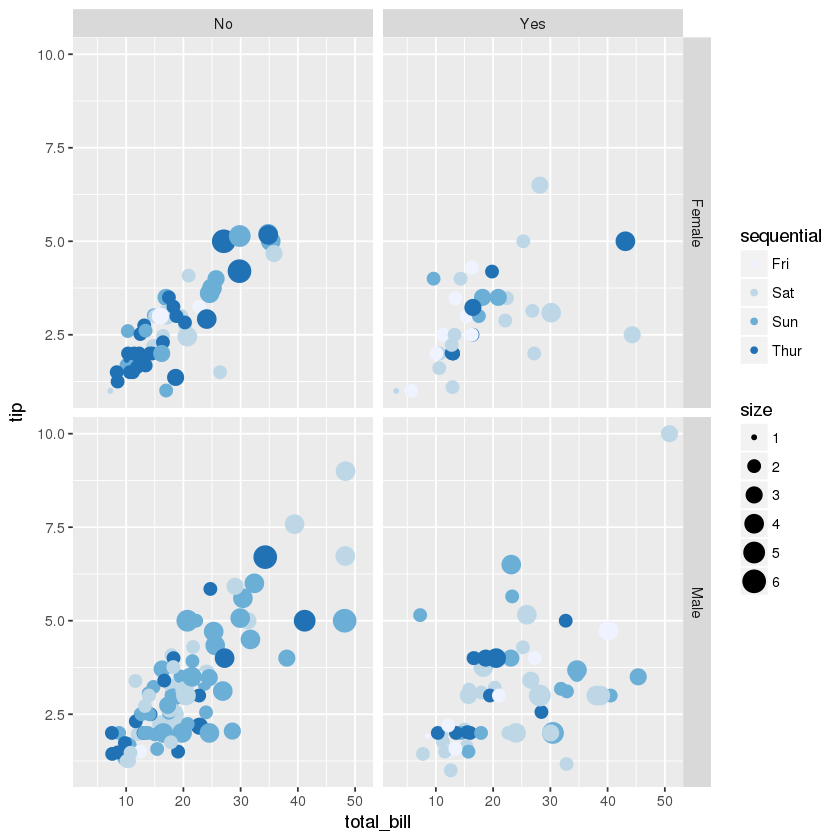

In [11]:
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,size=size)) + geom_point()
p + facet_grid(sex ~ smoker) + scale_colour_brewer('sequential')

Or course, the order of the days is wronf because they are ordered with respect to the alphabetical order. We could create another attribute that would take a value according to the day such as Thur=1, Fri=2, etc. and use that to plot our scatterplot. 

We also see that there are too many points superposed. Let's use transparency so that we can distinguish a little bit more. 

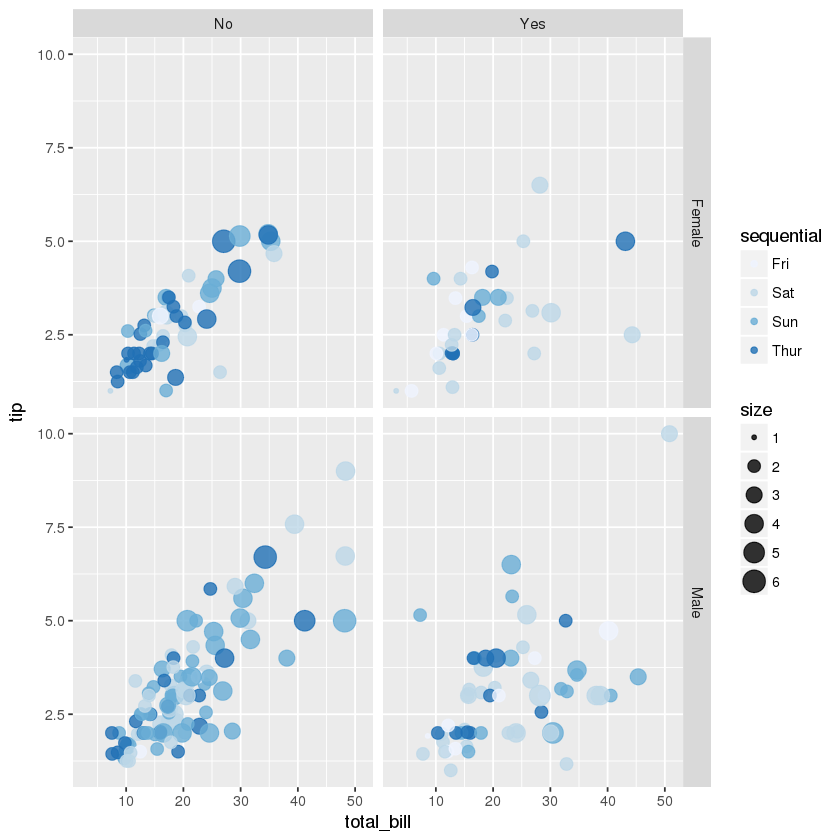

In [12]:
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,size=size)) + geom_point(alpha=0.8)
p + facet_grid(sex ~ smoker) + scale_colour_brewer('sequential')

Let's use another data set. Below exercises use the fishcatch dataset. The dataset is about 159 fish that are caught and measured. They belong to seven different species. 

In [13]:
fishcatch_data=read.csv("../../../datasets/fishcatch/fishcatch.csv")
head(fishcatch_data)

X,obs,species,weight,length1,length2,length3,height,width,sex
1,1,1,242,23.2,25.4,30.0,38.4,13.4,NA
2,2,1,290,24.0,26.3,31.2,40.0,13.8,NA
3,3,1,340,23.9,26.5,31.1,39.8,15.1,NA
4,4,1,363,26.3,29.0,33.5,38.0,13.3,NA
5,5,1,430,26.5,29.0,34.0,36.6,15.1,NA
6,6,1,450,26.8,29.7,34.7,39.2,14.2,NA


In [14]:
str(fishcatch_data)

'data.frame':	158 obs. of  10 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ obs    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ species: int  1 1 1 1 1 1 1 1 1 1 ...
 $ weight : num  242 290 340 363 430 450 500 390 450 500 ...
 $ length1: num  23.2 24 23.9 26.3 26.5 26.8 26.8 27.6 27.6 28.5 ...
 $ length2: num  25.4 26.3 26.5 29 29 29.7 29.7 30 30 30.7 ...
 $ length3: num  30 31.2 31.1 33.5 34 34.7 34.5 35 35.1 36.2 ...
 $ height : num  38.4 40 39.8 38 36.6 39.2 41.1 36.2 39.9 39.3 ...
 $ width  : num  13.4 13.8 15.1 13.3 15.1 14.2 15.3 13.4 13.8 13.7 ...
 $ sex    : int  NA NA NA NA NA NA NA NA NA NA ...


**Activity 7: ** Identify the data types of variables in the dataframe.

**Answer: ** obs (observations), sex, and species can be considered as nominal variables.
Variables height, length1, length2, length3, weight, and width are quantitative variables; they are ratios as they are measured with respect to a unit.

**Activity 8: ** Plot the variables height and weight of **fishcatch_data** on x and y axes of two dimensional scatter plot respectively. Do the positions of points suggest anything?

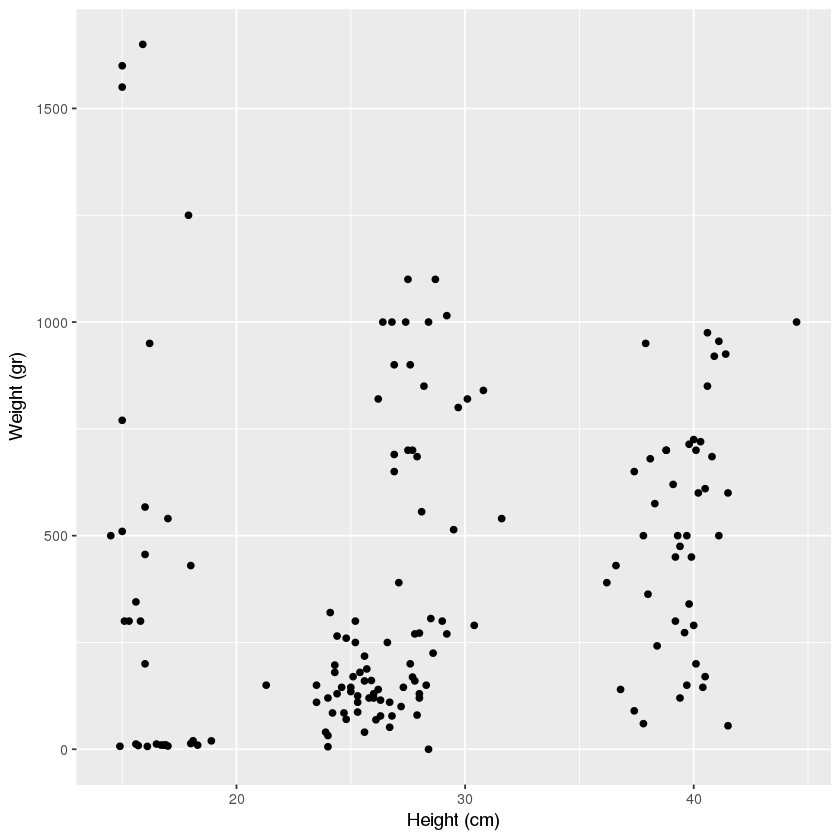

In [15]:
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight)) + geom_point()
p3 + xlab("Height (cm)") + ylab("Weight (gr)")

Above plot shows clusters of data points. Each set of points have different weights and heights. There is no way to tell which set of points belong to what species. Use the color visual variable to differentiate the points among species.

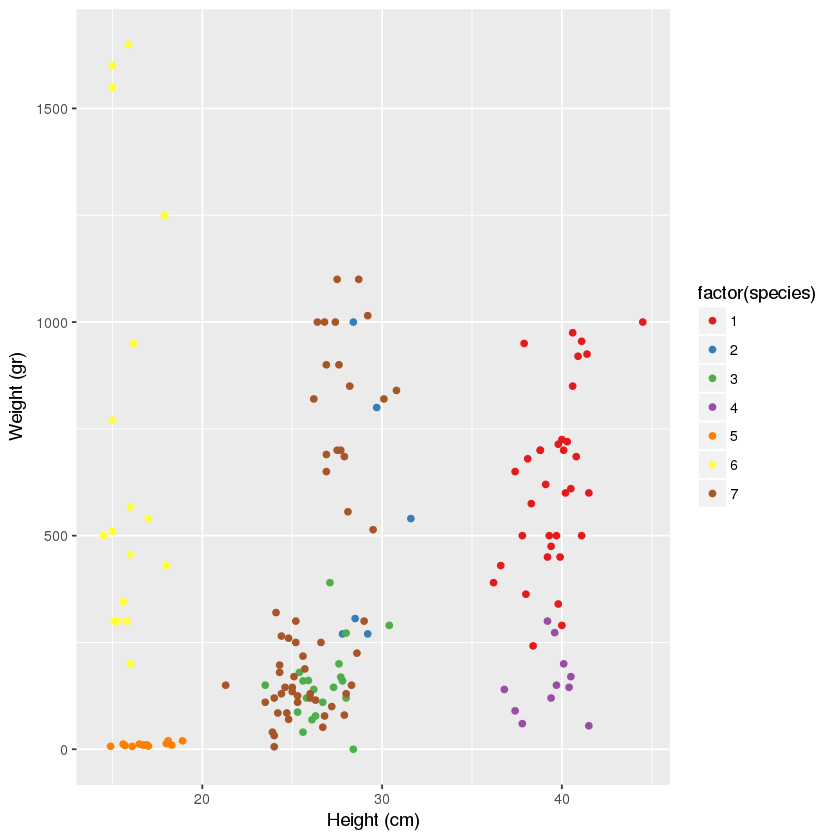

In [16]:
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight, color=factor(species))) + geom_point() + scale_colour_brewer(palette = "Set1")
p3 + xlab("Height (cm)") + ylab("Weight (gr)")

Let's add sex to the plot by assigning it shape variable since it's nominal.

Warning message:
“Removed 87 rows containing missing values (geom_point).”

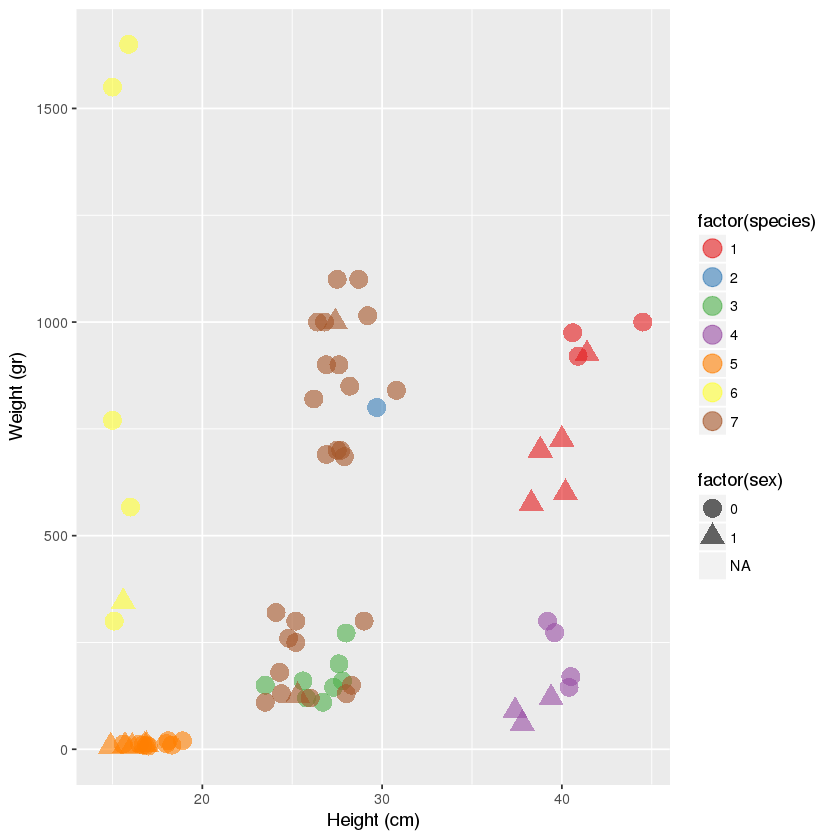

In [17]:
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight, color=factor(species), shape=factor(sex))) + geom_point(size=5,alpha=0.6) + scale_colour_brewer(palette = "Set1")
p3 + xlab("Height (cm)") + ylab("Weight (gr)")

We can see different species cluster nicely except species 3 and 7, and sex does not seem to have much of an effect. 

Now, let's see how we can plot a box and whiskers plot to visualize the summary statistics of a data set. Let's use the diamonds data set for it; and plot color vs. price for each clarity category.

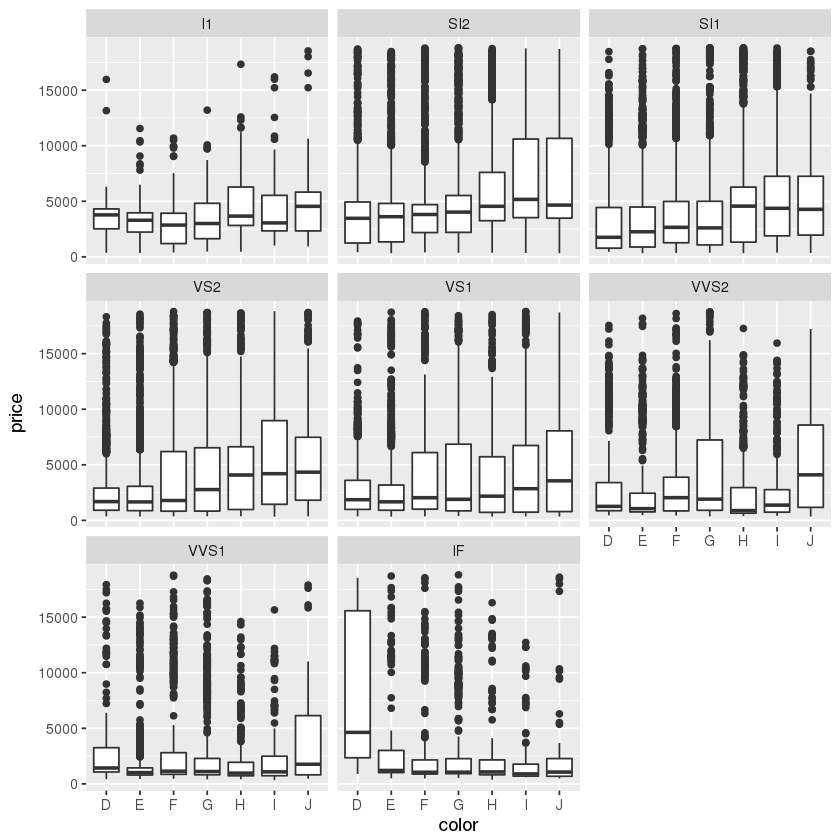

In [18]:
p3 <- ggplot(diamonds, aes(x=color, y=price)) + geom_boxplot() + facet_wrap(~ clarity)
p3

Thick black line is the median, the edges of the box show the 25th and 75th quantiles, and the dots are the outliers. Because there are many outliers with very high values, let's sclae the y-axis with a log scale. 

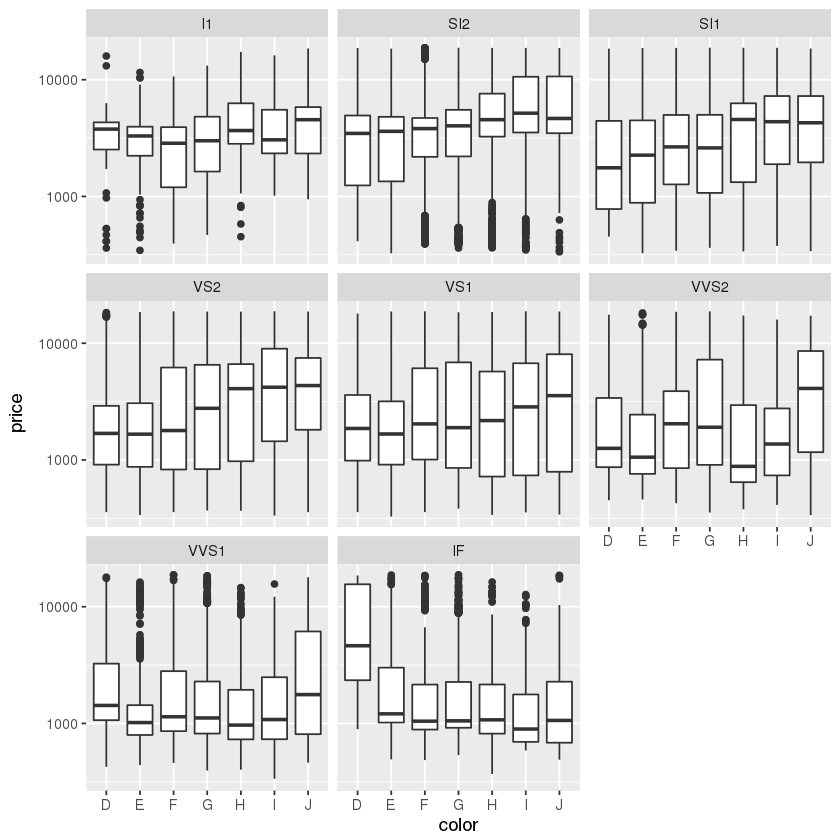

In [19]:
p3+scale_y_log10()

This plot shows the statistics better, but it doesn't show the details of the distribution. We can use a **violin plot** too se the density. 

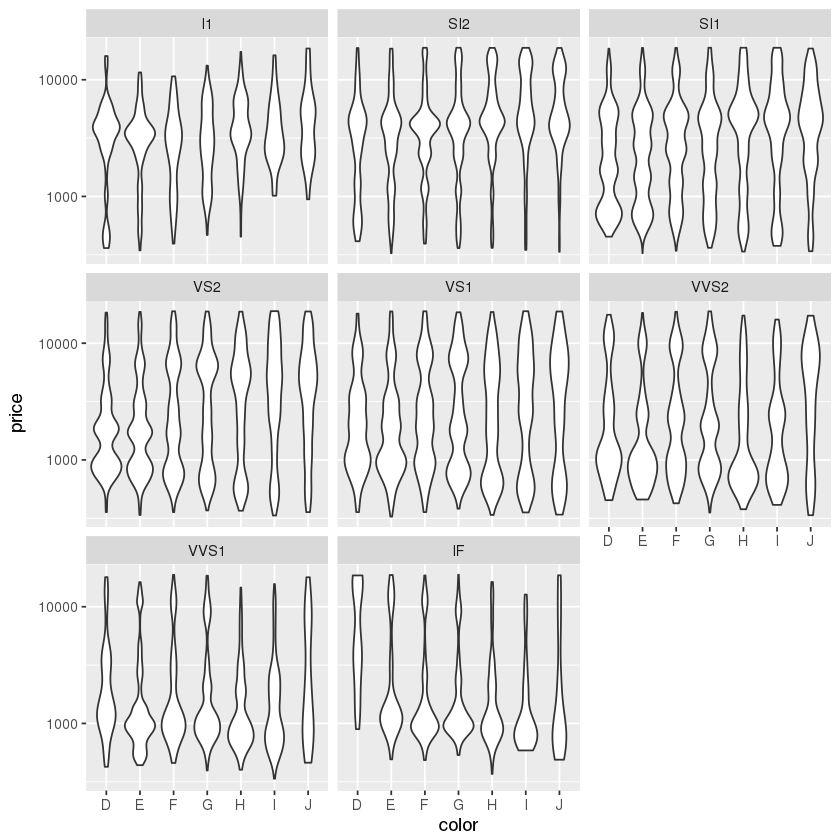

In [20]:
p3 <- ggplot(diamonds, aes(x=color, y=price)) + geom_violin() + facet_wrap(~ clarity) + scale_y_log10()
p3

Now we can see the distribution as the width at each point in this plot represents the frequency of the corresponding price.

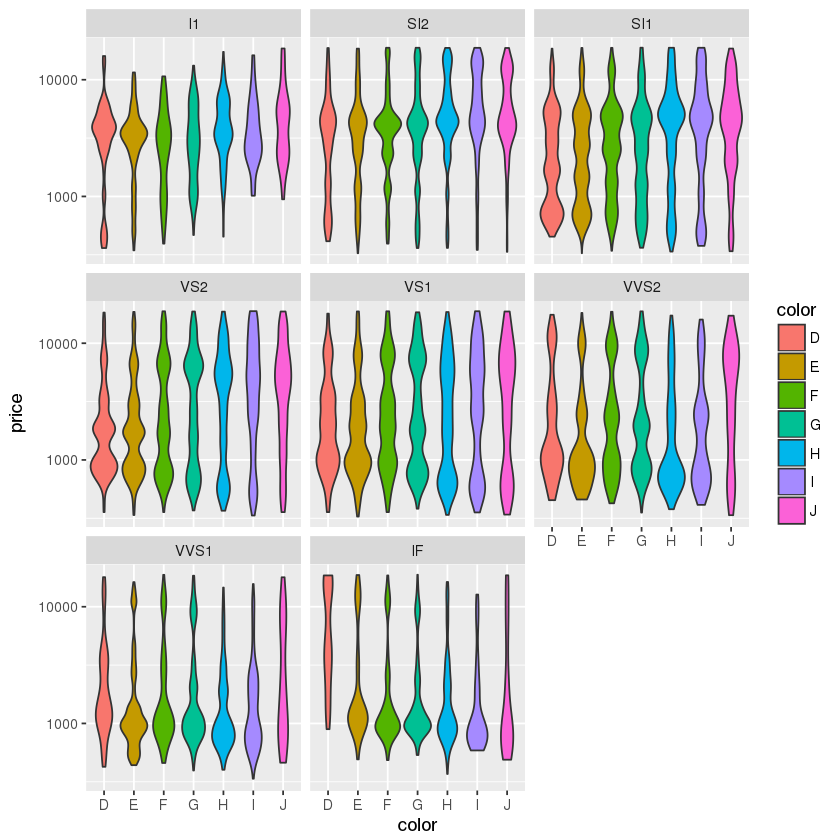

In [21]:
(p3 <- ggplot(diamonds, aes(x=color, y=price)) + geom_violin(aes(fill=color)) + facet_wrap(~ clarity) + scale_y_log10())